# RNN

In [188]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt

# Explore RNN type

In [189]:
# set layer parameters
input_size = 9 # number of features
hidden_size = 16 # number of units in hidden state
num_layers = 1 # number of vertical stacks of hidden layers (note:only the final layer)
actfun = 'tanh' # the default activation function is tanh
bias = True

rnn = nn.RNN(input_size, hidden_size, num_layers, actfun, bias)
rnn

RNN(9, 16)

In [190]:
help(rnn)

Help on RNN in module torch.nn.modules.rnn object:

class RNN(RNNBase)
 |  RNN(*args, **kwargs)
 |
 |  __init__(input_size,hidden_size,num_layers=1,nonlinearity='tanh',bias=True,batch_first=False,dropout=0.0,bidirectional=False,device=None,dtype=None)
 |
 |  Apply a multi-layer Elman RNN with :math:`\tanh` or :math:`\text{ReLU}`
 |  non-linearity to an input sequence. For each element in the input sequence,
 |  each layer computes the following function:
 |
 |  .. math::
 |      h_t = \tanh(x_t W_{ih}^T + b_{ih} + h_{t-1}W_{hh}^T + b_{hh})
 |
 |  where :math:`h_t` is the hidden state at time `t`, :math:`x_t` is
 |  the input at time `t`, and :math:`h_{(t-1)}` is the hidden state of the
 |  previous layer at time `t-1` or the initial hidden state at time `0`.
 |  If :attr:`nonlinearity` is ``'relu'``, then :math:`\text{ReLU}` is used instead of :math:`\tanh`.
 |
 |  .. code-block:: python
 |
 |      # Efficient implementation equivalent to the following with bidirectional=False
 |      

In [191]:
# set data parameters
sequence_length = 5 # Number of time steps in each sequence
batch_size = 2 # Number of independent sequences in one batch
 
x = torch.randn(sequence_length, batch_size, input_size) 
""" Time Step 1 → [ batch 1 input, batch 2 input ]
Time Step 2 → [ batch 1 input, batch 2 input ]
...
Time Step 5 """
x.shape , x

(torch.Size([5, 2, 9]),
 tensor([[[-0.8667,  0.5430,  0.1576,  0.9693,  1.4738, -0.9589, -0.3983,
           -0.2986,  0.3648],
          [-2.5972,  0.1758,  1.7133, -0.3807,  0.2114, -0.4257,  1.7196,
            1.0784,  1.2536]],
 
         [[ 1.5445, -0.1684,  0.7350,  0.2803, -0.7609, -1.6744, -0.4161,
           -0.0472,  0.6971],
          [ 1.2870,  1.6969, -1.0791, -1.1122, -0.2135, -0.9434,  1.1309,
           -0.6153, -0.4247]],
 
         [[ 1.0684,  0.6740, -0.9631,  0.8369,  0.2904, -2.5147, -1.0644,
            0.1817,  0.1770],
          [ 1.8128, -0.6789,  1.6609, -0.0377, -0.4671,  0.2259,  0.6029,
           -0.2993,  0.5781]],
 
         [[-0.3755,  1.8514, -1.6547,  0.6571,  0.6335, -0.6594, -1.0161,
           -0.1344, -1.2650],
          [ 0.3302,  0.2606,  0.5073,  0.6230, -0.6455, -1.7582, -0.8056,
            0.6748,  0.7256]],
 
         [[ 0.2193, -0.4006, -1.3591, -0.2412, -0.1852,  0.9668,  0.2606,
            0.3437, -0.6634],
          [ 0.3202, -0.3887,

In [192]:
hidden = torch.zeros(num_layers, batch_size, hidden_size) # default hidden state is zeros

output, hidden = rnn(x, hidden)
print(f'input shape: {x.shape}')
print(f'hidden shape: {hidden.shape}')
print(f'output shape: {output.shape}') # this is the output of the hidden layer

input shape: torch.Size([5, 2, 9])
hidden shape: torch.Size([1, 2, 16])
output shape: torch.Size([5, 2, 16])


In [193]:
for p in rnn.named_parameters():
    if 'weight' in p[0]:
        print(f'{p[0]} has size of weights: {p[1].shape}')

weight_ih_l0 has size of weights: torch.Size([16, 9])
weight_hh_l0 has size of weights: torch.Size([16, 16])


# Create DL model

In [194]:
class RNNnet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()

        # store parameters
        self.input_size = input_size
        self.num_hidden = hidden_size
        self.num_layers = num_layers

        # define the RNN
        self.rnn = nn.RNN(input_size, hidden_size, num_layers)

        # linear layer for output
        self.out = nn.Linear(hidden_size, 1)
    def forward(self, x):

        print(f'Input shape: {x.shape}')

        # initialize the hidden state for the first input

        hidden = torch.zeros(self.num_layers,batch_size,self.num_hidden)  
        print(f'hidden shape: {hidden.shape}')

        # run through the RNN layer
        y,hidden = self.rnn(x,hidden)  
        print(f'RNN-out: {list(y.shape)}')
        print(f'RNN-hidden: {list(hidden.shape)}')

        # pass the RNN output through the linear output layer 
        o = self.out(y)
        print(f'Output shape: {list(o.shape)}')

        return o,hidden

In [195]:
input_size = 9 # number of features
hidden_size = 16 # number of units in hidden state
num_layers = 1 # number of vertical stacks of hidden layers (note:only the final layer)
net = RNNnet(input_size, hidden_size, num_layers)
net

RNNnet(
  (rnn): RNN(9, 16)
  (out): Linear(in_features=16, out_features=1, bias=True)
)

In [196]:
for p in net.named_parameters():
    if 'weight' in p[0]:
        print(f'{p[0]} has size of weights: {p[1].shape}')

rnn.weight_ih_l0 has size of weights: torch.Size([16, 9])
rnn.weight_hh_l0 has size of weights: torch.Size([16, 16])
out.weight has size of weights: torch.Size([1, 16])


In [197]:
X = torch.rand(sequence_length, batch_size, input_size)
y = torch.rand(sequence_length, batch_size, 1)
yhat,h = net(X)
lossfun = nn.MSELoss()
lossfun(yhat,y)

Input shape: torch.Size([5, 2, 9])
hidden shape: torch.Size([1, 2, 16])
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output shape: [5, 2, 1]


tensor(0.0754, grad_fn=<MseLossBackward0>)

# Example

## Create temporal sequence

In [198]:
N = 50
data = torch.zeros(N)
for i in range(N):
    data[i] = torch.rand(1) * (-1)**(i)
data

tensor([ 0.3811, -0.1157,  0.7260, -0.6204,  0.1626, -0.5026,  0.3097, -0.2483,
         0.3477, -0.8976,  0.1949, -0.0697,  0.6740, -0.9365,  0.0108, -0.1325,
         0.1835, -0.6061,  0.3761, -0.8243,  0.5213, -0.6839,  0.8859, -0.1992,
         0.1589, -0.5886,  0.9611, -0.4941,  0.8229, -0.6459,  0.1194, -0.4173,
         0.7067, -0.4486,  0.8628, -0.4470,  0.1206, -0.9132,  0.0226, -0.6430,
         0.4725, -0.0958,  0.6335, -0.3346,  0.4486, -0.9224,  0.0865, -0.8150,
         0.6803, -0.5928])

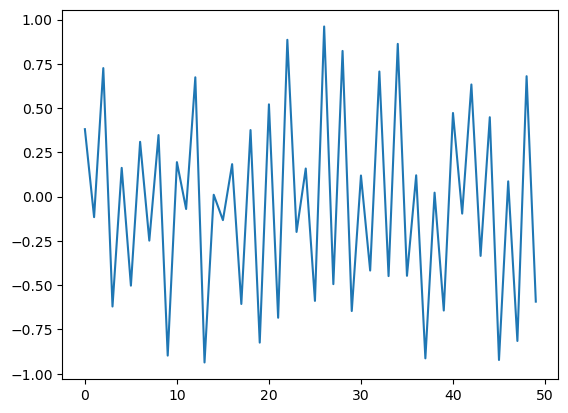

In [199]:
plt.Figure(figsize=(18,10))
plt.plot(data)
plt.show()

In [200]:
class RNNmodel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,batch_size):
        super().__init__()

        # store parameters
        self.input_size = input_size
        self.num_hidden = hidden_size
        self.num_layers = num_layers
        self.batch_size = batch_size

        # define the RNN
        self.rnn = nn.RNN(input_size, hidden_size, num_layers)

        # linear layer for output
        self.out = nn.Linear(hidden_size, 1)
    def forward(self, x):

        hidden = torch.zeros(self.num_layers,self.batch_size,self.num_hidden)  
        y,hidden = self.rnn(x)  
        o = self.out(y)
        return o,hidden

In [201]:
input_size = 1 
num_hidden = 5
num_layers = 1
sequence_length = 9
batch_size = 1

net = RNNmodel(input_size, num_hidden, num_layers,batch_size)
X = torch.rand(sequence_length, batch_size, input_size)
y = torch.rand(sequence_length, batch_size, 1)
y,h = net(X)
X.shape , y.shape, h.shape

(torch.Size([9, 1, 1]), torch.Size([9, 1, 1]), torch.Size([1, 1, 5]))

In [ ]:
somedata = data[:sequence_length].view(sequence_length,1,1)
somedata
# 	•	9 time steps (seq_len = 9)
#	•	batch size of 1
#	•	1 feature per time step

tensor([[[ 0.3811]],

        [[-0.1157]],

        [[ 0.7260]],

        [[-0.6204]],

        [[ 0.1626]],

        [[-0.5026]],

        [[ 0.3097]],

        [[-0.2483]],

        [[ 0.3477]]])

In [203]:
y = net(somedata)
finalValue = y[0][-1]
lossfun = nn.MSELoss()
lossfun(finalValue,data[sequence_length].view(1,1))

tensor(0.6571, grad_fn=<MseLossBackward0>)

# Train RNN

In [204]:
def trainRNN(net,data,lossfun,optimizer,num_epochs ,sequence_length = 9):

    losses = np.zeros(num_epochs)
    sign_accuracy = np.zeros(num_epochs)
    
    # loop over epochs
    for epoch in range(num_epochs):

        segmentLosses = []
        segmentAccuracies = []
        
        hidden_state = torch.zeros(net.num_layers,net.batch_size,net.num_hidden)

        for time in range(len(data)-sequence_length):

            # get data
            x = data[time:time+sequence_length].view(sequence_length,1,1)
            y = data[time+sequence_length].view(1,1)

            # forward pass
            yHat,hidden_state = net(x)
            finalValue = yHat[-1]

            # compute loss
            loss = lossfun(finalValue,y)
            segmentLosses.append(loss.item())

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss and accuracy from this batch
            true_sign = np.sign(torch.squeeze(y).numpy())
            pred_sign = np.sign(torch.squeeze(finalValue).detach().numpy())
            accuracy = 100*(true_sign==pred_sign)
            segmentAccuracies.append(accuracy)

        sign_accuracy[epoch]    = np.mean(segmentAccuracies) 
        losses[epoch] = np.mean(segmentLosses)
        print(f'Epoch {epoch}') 
        print(f'Training Loss: {losses[epoch]:.4f} | Training Accuracy: {sign_accuracy[epoch]:.2f}%')

In [205]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.001)
lossfun = nn.MSELoss()

trainRNN(net,data,lossfun,optimizer,35)

Epoch 0
Training Loss: 0.3618 | Training Accuracy: 48.78%
Epoch 1
Training Loss: 0.3472 | Training Accuracy: 51.22%
Epoch 2
Training Loss: 0.3338 | Training Accuracy: 51.22%
Epoch 3
Training Loss: 0.3213 | Training Accuracy: 53.66%
Epoch 4
Training Loss: 0.3095 | Training Accuracy: 58.54%
Epoch 5
Training Loss: 0.2984 | Training Accuracy: 68.29%
Epoch 6
Training Loss: 0.2878 | Training Accuracy: 73.17%
Epoch 7
Training Loss: 0.2778 | Training Accuracy: 80.49%
Epoch 8
Training Loss: 0.2681 | Training Accuracy: 80.49%
Epoch 9
Training Loss: 0.2588 | Training Accuracy: 90.24%
Epoch 10
Training Loss: 0.2499 | Training Accuracy: 90.24%
Epoch 11
Training Loss: 0.2413 | Training Accuracy: 90.24%
Epoch 12
Training Loss: 0.2329 | Training Accuracy: 90.24%
Epoch 13
Training Loss: 0.2249 | Training Accuracy: 92.68%
Epoch 14
Training Loss: 0.2171 | Training Accuracy: 92.68%
Epoch 15
Training Loss: 0.2095 | Training Accuracy: 92.68%
Epoch 16
Training Loss: 0.2022 | Training Accuracy: 95.12%
Epoch 1

# Test the model

In [206]:
# initialize hidden state 
h = np.zeros((len(data),net.num_hidden))
yHat = np.zeros(len(data))
yHat[:sequence_length] = np.nan

for time in range(N-sequence_length):

    X = data[time:time+sequence_length].view(sequence_length,1,1)
    
    yy,hh = net(X)
    yHat[time+sequence_length] = yy[-1]
    h[time+sequence_length,:] = hh.detach().numpy()

true_sign = np.sign(data.numpy())
pred_sign = np.sign(yHat)
accuracy = 100*(true_sign[sequence_length:]==pred_sign[sequence_length:])


[[1.         0.80985267]
 [0.80985267 1.        ]]


/var/folders/tn/ydlwf6sn6bb5ccy1g888k1q40000gn/T/ipykernel_1085/1225184466.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].plot(data-yHat,'k^')


Text(0.5, 1.0, 'r = 0.81')

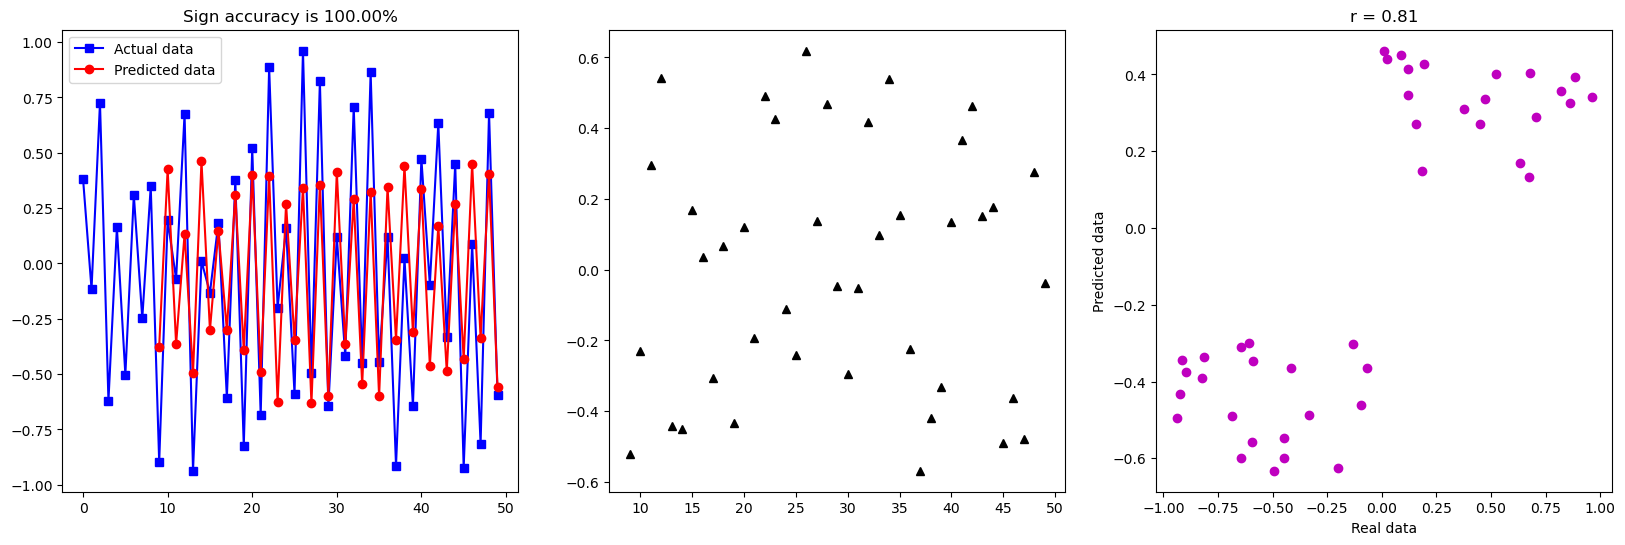

In [207]:
fig,ax = plt.subplots(1,3,figsize = (20,6))
ax[0].plot(data,'bs-',label='Actual data')
ax[0].plot(yHat,'ro-',label='Predicted data')
ax[0].set_title('Sign accuracy is %.2f%%' % np.mean(accuracy))
ax[0].legend()

ax[1].plot(data-yHat,'k^')

r = np.corrcoef(data[sequence_length:],yHat[sequence_length:])
print(r)

ax[2].plot(data[sequence_length:], yHat[sequence_length:],'mo')
ax[2].set_xlabel('Real data')
ax[2].set_ylabel('Predicted data')
ax[2].set_title(f'r = {r[0,1]:.2f}')